# Figure 11.SM.1 - TNn scaling

Author: Mathias Hauser

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

import conf
from utils import computation, scaling_plot, save_figuredata, plot
import data_tables

mpl.rcParams['figure.dpi'] = 200
mpl.rcParams['font.sans-serif'] = "Arial"

In [2]:
FIGURE_FOLDER = "Figure_11.SM.1_TNn_scaling"

plot.create_figure_folders(FIGURE_FOLDER, conf.cmip6)

## Load data

### global mean tas

In [3]:
c6_tas = conf.cmip6.load_post_all_concat(
    varn="tas",
    postprocess="global_mean"
)

 -- {'varn': 'tas', 'postprocess': 'global_mean', 'table': 'Amon', 'model': 'IITM-ESM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2098)


In [4]:
c6_tnn_reg_no_anom = conf.cmip6.load_post_all_concat(
    varn="tasmin",
    postprocess="tnn_reg_ave_ar6",
    anomaly="no_anom"
)

-- no data found for: {'exp': 'historical', 'varn': 'tasmin', 'postprocess': 'tnn_reg_ave_ar6', 'table': 'day', 'model': 'EC-Earth3', 'ens': 'r4i1p1f1', 'grid': 'gr', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmin', 'postprocess': 'tnn_reg_ave_ar6', 'table': 'day', 'model': 'IITM-ESM', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}
-- no data found for: {'exp': 'historical', 'varn': 'tasmin', 'postprocess': 'tnn_reg_ave_ar6', 'table': 'day', 'model': 'GISS-E2-1-G', 'ens': 'r1i1p5f2', 'grid': 'gn', 'ensnumber': 0}
 -- {'varn': 'tasmin', 'postprocess': 'tnn_reg_ave_ar6', 'table': 'day', 'model': 'BCC-ESM1', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)
 -- {'varn': 'tasmin', 'postprocess': 'tnn_reg_ave_ar6', 'table': 'day', 'model': 'MPI-ESM-1-2-HAM', 'exp': 'ssp370', 'ens': 'r1i1p1f1', 'grid': 'gn', 'ensnumber': 0}: no data for 2099 - 2099 (1850..2055)


In [5]:
c6_tnn_reg = computation.process_datalist(
    computation.calc_anomaly, c6_tnn_reg_no_anom, start=1850, end=1900, how="absolute"
)

### Compute at warming levels

In [6]:
warming_levels = np.arange(0.1, 5.1, 0.1)

c6_at_warming_tnn_ = computation.at_warming_levels_list(
    c6_tas, c6_tnn_reg, warming_levels=warming_levels
)

concat and ensure correct alignment

In [7]:
c6_at_warming_tnn = scaling_plot.concat_for_scaling(c6_at_warming_tnn_, warming_levels)

## Scaling plot

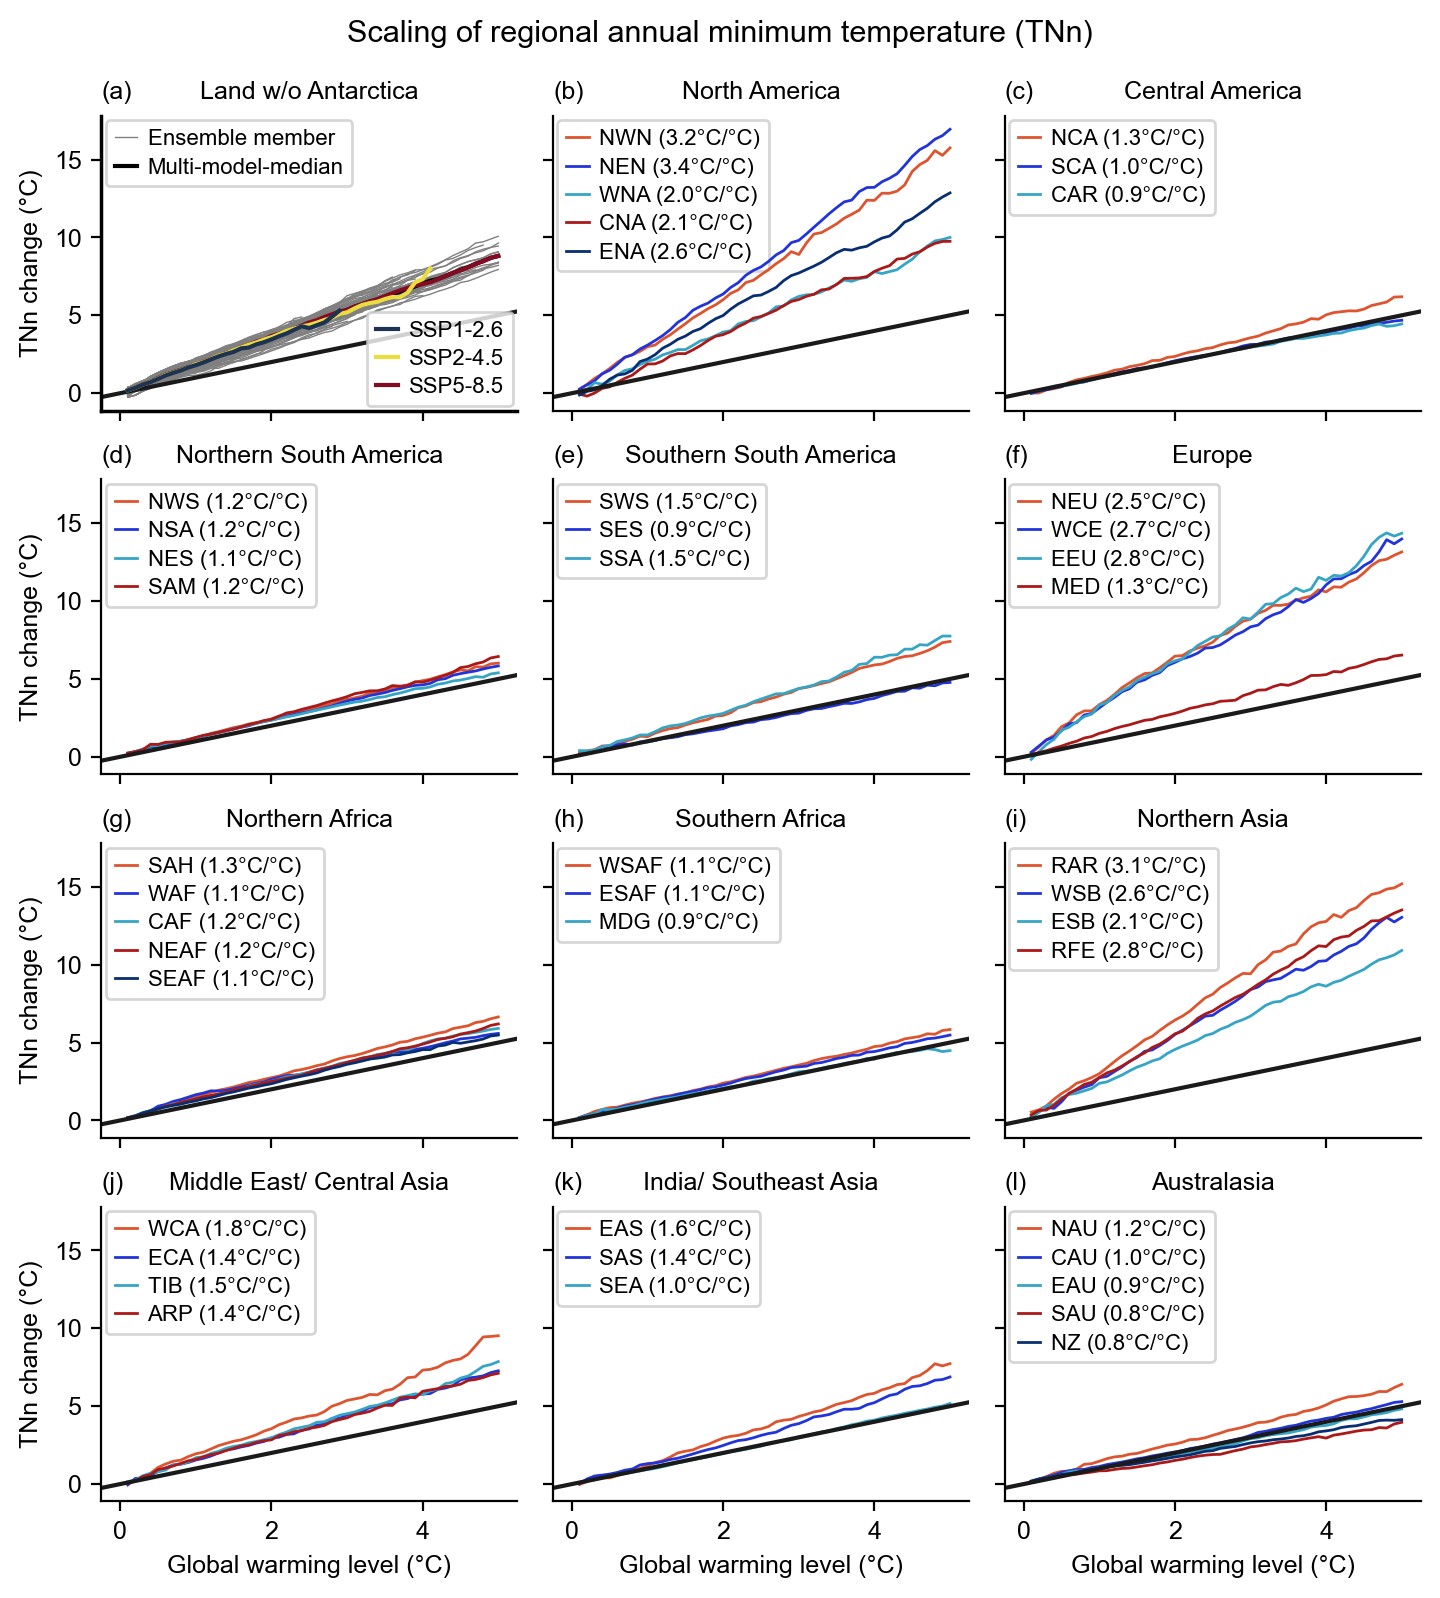

In [8]:
scaling_plot.plot_scaling(
    c6_at_warming_tnn,
    title="Scaling of regional annual minimum temperature (TNn)",
    conf_cmip=conf.cmip6,
    ylabel="TNn change (°C)",
)

fN = conf.cmip6.figure_filename(
    "Figure_11.A.1_TNn_scaling", FIGURE_FOLDER, add_prefix=False
)

plt.savefig(fN + ".pdf")
plt.savefig(fN + ".png", dpi=300, facecolor="w")

# data table
# use the non-concatenated data

fN = conf.cmip6.figure_filename(
    "Figure_11.A.1_TNn_scaling", FIGURE_FOLDER, "data_tables", add_prefix=False
)

data_tables.save_simulation_info_raw(fN + "_md_raw", c6_at_warming_tnn_[0], panel="a-l")

In [9]:
# save figure data

varn = "TNn"
sfd = save_figuredata.SaveFiguredata(
    figure="Figure 11.A.1",
    units="°C",
    varn=varn,
)


fN = conf.cmip6.figure_filename(
    f"Figure_11.A.1_cmip6_{varn}_scaling.nc",
    FIGURE_FOLDER,
    "figure_data",
    add_prefix=False,
)


c6_at_warming_tnn.attrs["long_name"] = "Annual minimum temperature"
c6_at_warming_tnn.attrs["comment"] = "anomaly wrt 1850-1900"


ds = sfd.scaling(
    da=c6_at_warming_tnn,
    panels="(a) to (l)",
)
ds.to_netcdf(fN)